#Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense

#Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


# Считываем файл в DataFrame





In [ ]:
df = pd.read_csv('Titanic.csv', delimiter=",", encoding='utf-8')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Разведывательный анализ данных

 информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 
 Число столблцов =  5
Числовые данные:	  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
 Число столблцов =  7


## Анализ числовых признаков

### Статистика по числовым данным

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Распределение значений по каждому числовому признаку

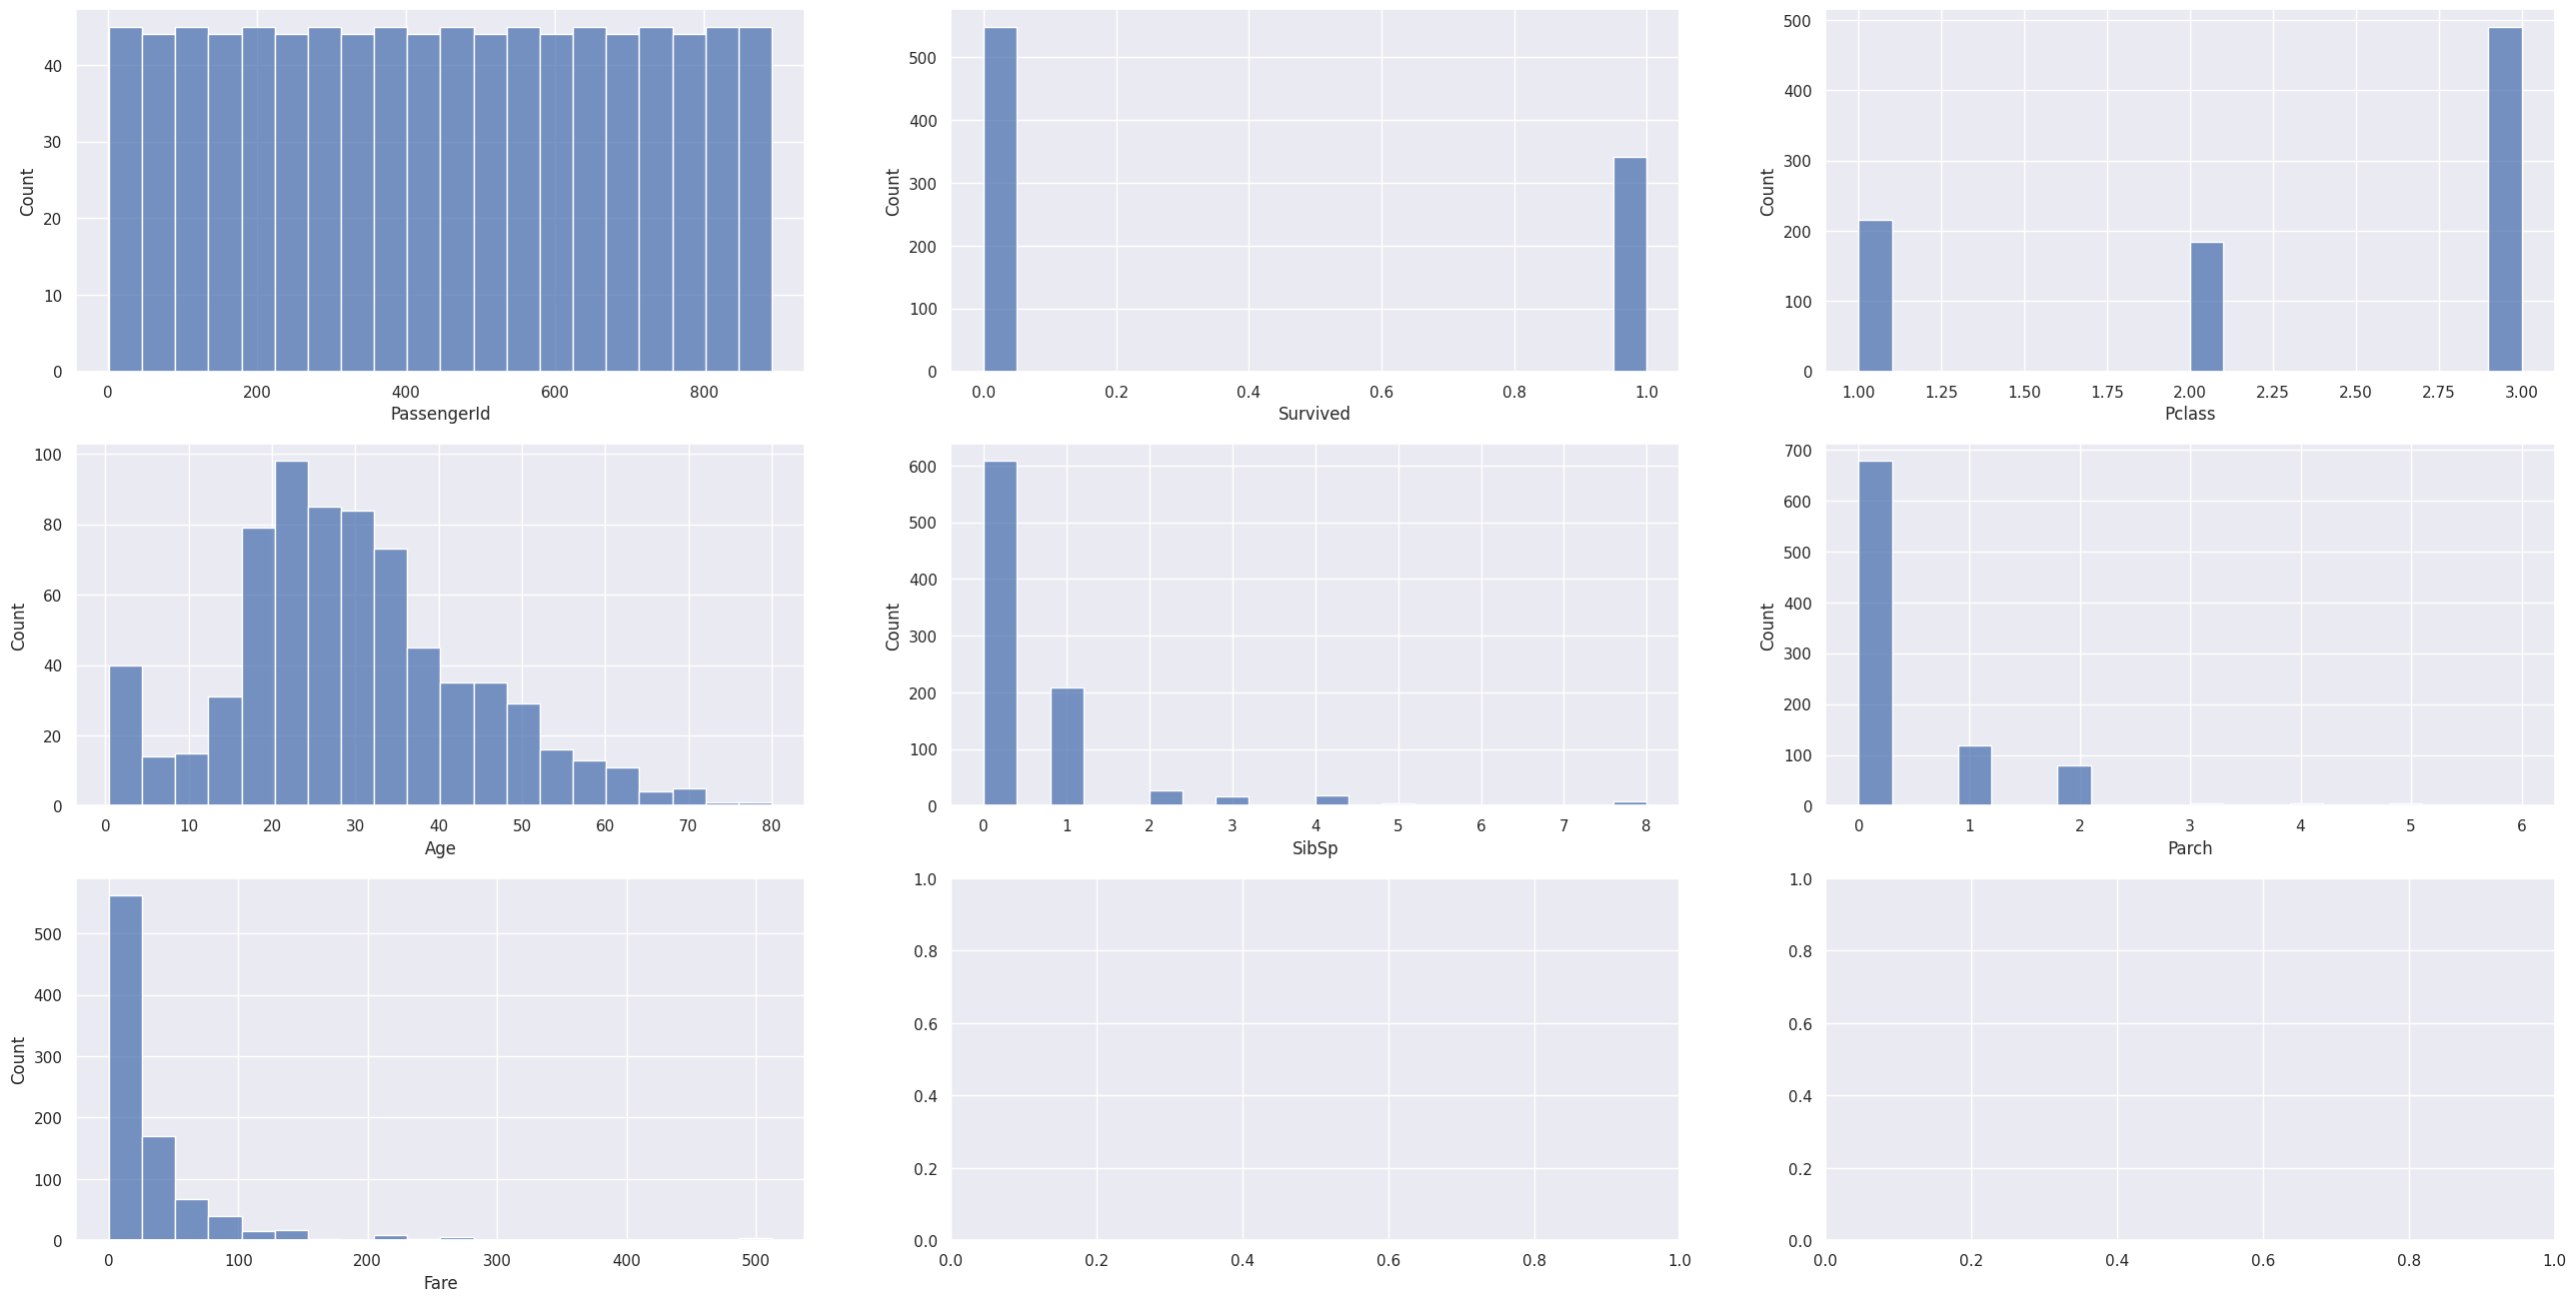

In [ ]:
width = 3
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(32,16)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

Столбец Age имеет нормальное распределение. SibSp, Parch, Fare требуют нелинейного преобразования

### Очистка числовых признаков

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.
Мы можем удалить записи, PassengerId, так как они не несут ценности, по этой же причине удалим номер билета Ticket

In [ ]:

# здравый смысл
df = df.drop('PassengerId', axis=1)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Пропущенные значения

Проверим и заполним пропущенные значения

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-62-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Age'].isnull().sum()

0

### Стандартизация

In [ ]:
num_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
num_columns.remove('Survived')
num_columns.remove('PassengerId')

In [ ]:
scale = StandardScaler()

scale.fit(df[num_columns])

StandardScaler()

In [ ]:
scale.mean_, scale.scale_

(array([ 2.30864198, 29.36158249,  0.52300786,  0.38159371, 32.20420797]),
 array([ 0.83560193, 13.01238827,  1.10212444,  0.80560476, 49.66553444]))

In [ ]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445
1,-1.566107,0.663861,0.432793,-0.473674,0.786845
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854
3,-1.566107,0.433312,0.432793,-0.473674,0.420730
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381
888,0.827377,-0.104637,0.432793,2.008933,-0.176263
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381


### Корелляция числовых признаков

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

df_standard[num_columns].corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000


## Анализ категориальных данных

In [ ]:
df[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


### Статистика по категориальным данным

In [ ]:
df[cat_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Распределение значений по полу и классу

In [ ]:
cat_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

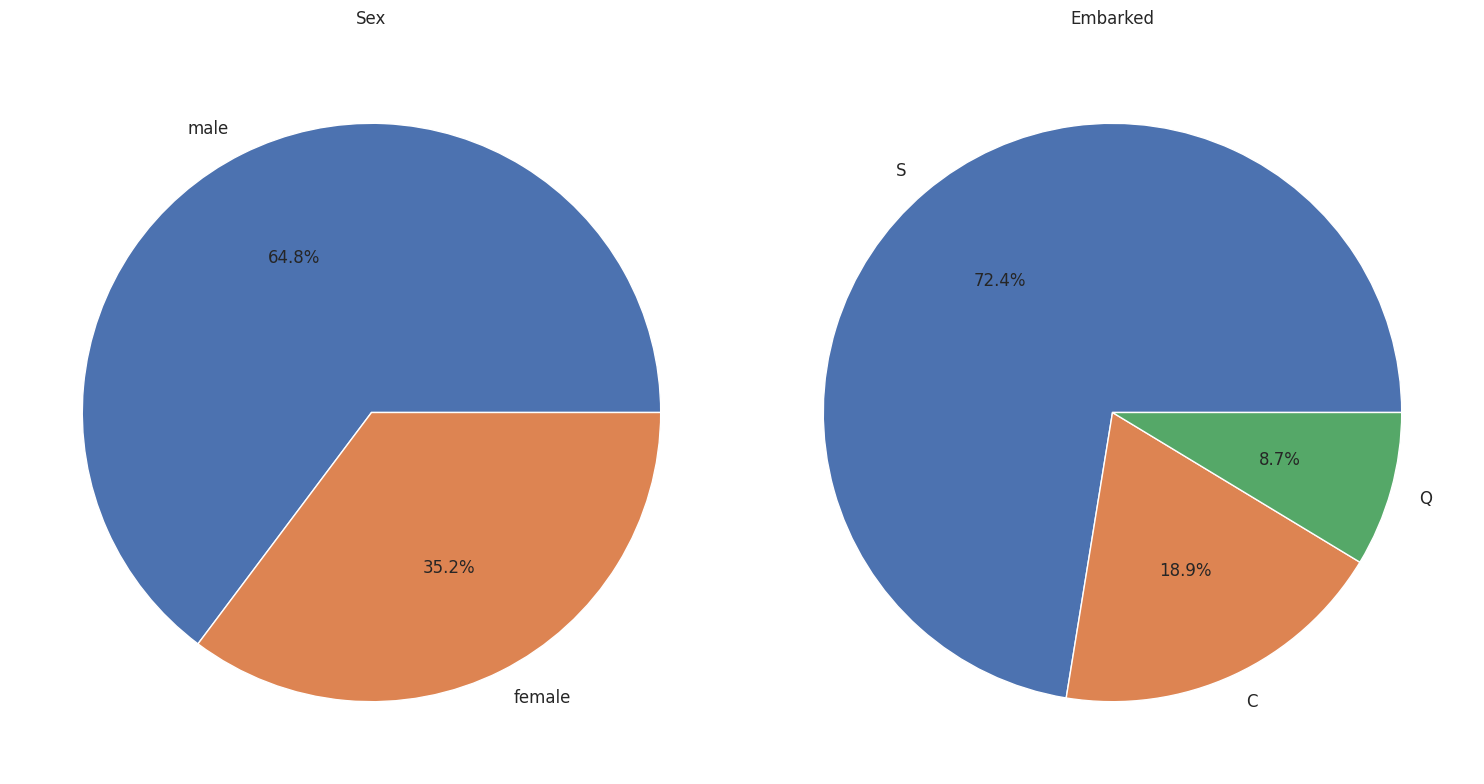

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes = axes.flatten()


for i, col in enumerate(['Sex', 'Embarked']):
    if i == 6:
      break
    categories = df[col].value_counts()
    axes[i].pie(categories.values, labels=categories.index, autopct='%1.1f%%', textprops={'fontsize': 12})
    axes[i].set_title(col, pad=20)



fig.subplots_adjust(wspace=0.1, hspace=1.0)
plt.tight_layout()
plt.show()

### Очистка категориальных значений

In [ ]:
# здравый смысл
df = df.drop('Cabin', axis=1)

# здравый смысл
df = df.drop('Ticket', axis=1)

# здравый смысл
df = df.drop('Name', axis=1)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,28.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


### Пустые значения

In [ ]:
df['Embarked'].fillna('S',inplace=True)

<ipython-input-75-5e175cf467d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [ ]:
df['Embarked'].isnull().sum()

0

### Кодирование категориальных признаков

In [ ]:
ordinal = OrdinalEncoder()
cat_columns.remove('Cabin')
cat_columns.remove('Ticket')
cat_columns.remove('Name')
ordinal.fit(df[cat_columns]);

In [ ]:
ordinal.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


### Корелляционная матрица категориальных признаков

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

df_ordinal.corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,Sex,Embarked
Sex,1.000000,0.108262
Embarked,0.108262,1.000000


##Объединим предобработанные признаки в один датафрейм

In [ ]:
DF = df_standard.join(df_ordinal)

In [ ]:
DF

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,0.0


In [ ]:
DF = pd.concat([DF, df['Survived']], axis=1)

In [ ]:
DF

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0,0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,1
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0,1
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0,1
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0,0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,2.0,0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,2.0,1
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,2.0,0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,0.0,1


### Корелляционная матрица

In [ ]:

cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

DF.corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.162098,-0.338481
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.018754,-0.064910
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,0.068230,-0.035322
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,0.039798,0.081629
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.224719,0.257307
Sex,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,0.108262,-0.543351
Embarked,0.162098,-0.018754,0.068230,0.039798,-0.224719,0.108262,1.000000,-0.167675
Survived,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,-0.167675,1.000000


# Обучение нейронной сети

In [ ]:
X = DF.drop(columns=['Survived'])
y = DF['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
445,-1.566107,-1.949034,-0.474545,2.008933,0.999770,1.0,2.0
650,0.827377,-0.104637,-0.474545,-0.473674,-0.489442,1.0,2.0
172,0.827377,-2.179583,0.432793,0.767630,-0.424256,0.0,2.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,1.0,2.0
314,-0.369365,1.048110,0.432793,0.767630,-0.119886,1.0,2.0
...,...,...,...,...,...,...,...
106,0.827377,-0.642586,-0.474545,-0.473674,-0.494391,0.0,2.0
270,-1.566107,-0.104637,-0.474545,-0.473674,-0.024246,1.0,2.0
860,0.827377,0.894411,1.340132,-0.473674,-0.364355,1.0,2.0
435,-1.566107,-1.180535,0.432793,2.008933,1.767741,0.0,2.0


In [ ]:
y.shape[0]

891

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4214 - loss: 0.7922 - val_accuracy: 0.6400 - val_loss: 0.7033
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5992 - loss: 0.7171 - val_accuracy: 0.6800 - val_loss: 0.6517
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6524 - loss: 0.6510 - val_accuracy: 0.6880 - val_loss: 0.6124
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.6318 - val_accuracy: 0.7120 - val_loss: 0.5777
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6813 - loss: 0.5841 - val_accuracy: 0.7440 - val_loss: 0.5466
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.5778 - val_accuracy: 0.7520 - val_loss: 0.5255
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7237 - loss: 0.5668 - val_accuracy: 0.7680 - val_loss: 0.5097
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.5403 - val_accuracy: 0.7680 - val_loss

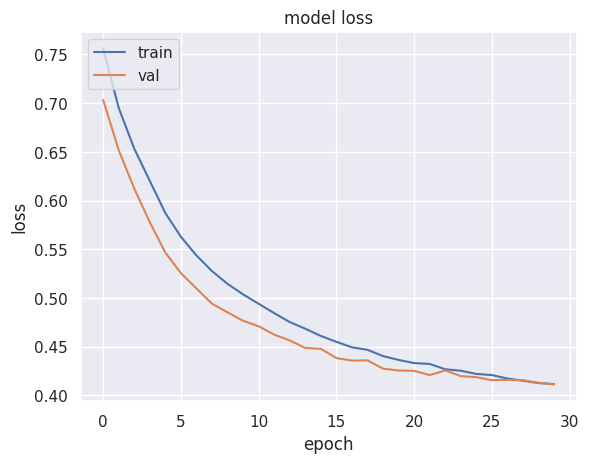

In [ ]:
history  = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.4044 
Test Accuracy: 0.82
